In [24]:
import os
import voc12.my_dataloader
from utility import image_util, util
from torch.utils.data import DataLoader
import torch
from misc import imutils
import importlib
import torch.nn.functional as F
import numpy as np
import importlib
import voc12.dataloader
import importlib
from tqdm import tqdm
from misc import indexing
from PIL import Image

In [25]:
depth_root = "../result/depth_img/"
voc_root ="../Dataset/VOC2012/"
cam_root = "../irn_result/cam/"
img_root = "../Dataset/VOC2012/JPEGImages/"

train_list = "voc12/train.txt"

device = "cuda:0"

In [ ]:
def depth_normalize(depth_img):
    min_val = np.min(depth_img)
    max_val = np.max(depth_img)

    # 0에서 1 사이로 정규화
    depth_img_normalized = (depth_img - min_val) / (max_val - min_val)

    # 0에서 255 사이의 정수로 스케일링
    depth_img_int = (depth_img_normalized * 255).astype(np.uint8)


In [31]:
img_id_list = voc12.my_dataloader.load_img_id_list(train_list)
model_type = "DPT_Hybrid"
model = torch.hub.load("intel-isl/MiDaS", model_type)
model = model.to(device)
model.eval()

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform
idx = 64
with torch.no_grad():
    # for idx in tqdm(range(len(img_id_list))):
    # for idx in range(100):    
    img_id = img_id_list[idx]
    file_name = os.path.join(img_root, img_id + ".jpg")
    
    img = np.asarray(Image.open(file_name).convert("RGB"))
    transform_input = transform(img).to(device)
    
    prediction = model(transform_input)
    
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
    
    depth_img = prediction.cpu().numpy()
    

Using cache found in /home/intern01/.cache/torch/hub/intel-isl_MiDaS_master
/home/intern01/.local/lib/python3.8/site-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(
Using cache found in /home/intern01/.cache/torch/hub/intel-isl_MiDaS_master


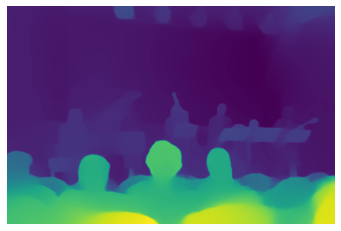

In [32]:
depth_img_int = (depth_img * 255).astype(np.uint8)